In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
#show y_pred and y_test in table order by pandas dataframe
dataset = pd.DataFrame(y_pred,y_test)
print(dataset)

    0
0   0
0   0
0   0
0   0
0   0
0   0
0   0
1   1
0   0
0   1
0   0
0   0
0   0
0   0
0   0
0   1
0   0
0   0
1   1
0   0
0   0
1   1
0   0
1   1
0   0
1   1
0   0
0   0
0   0
0   0
.. ..
1   1
0   0
0   0
1   1
0   0
0   0
0   0
0   0
1   1
1   1
1   1
0   1
0   0
0   0
1   1
1   0
0   0
1   1
1   1
0   0
0   0
1   1
0   0
0   0
0   0
1   0
0   0
1   1
1   1
1   1

[100 rows x 1 columns]


In [15]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmdataset = pd.DataFrame(cm)
#confusion matrix
print(cmdataset)

    0   1
0  64   4
1   3  29


In [16]:
#find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#report on accuracy
print(classification_report(y_test, y_pred))

0.93
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



In [26]:
#find best n_neighbors from error rate
error_rate=[]
for i in range(1,300):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0,0.5,'Error Rate')

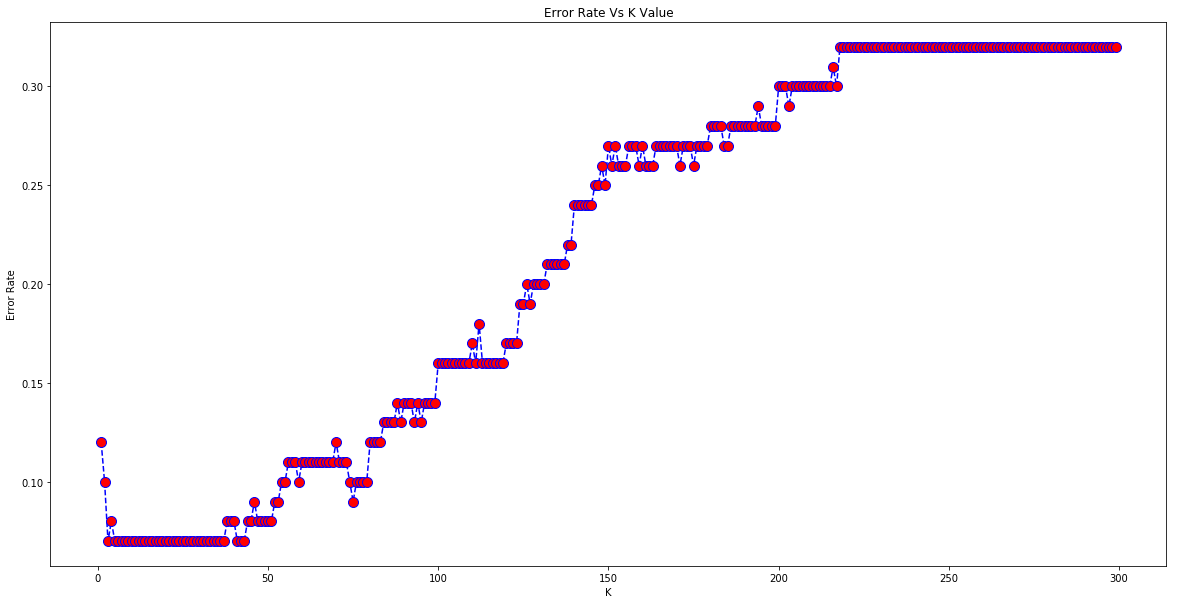

In [29]:
#plot the figure of error rate
plt.figure(figsize=(20,10))
plt.plot(range(1,300),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')